# Previsão de preços de voos 
Este dataset contém informação sobre voos do website [Easymytrip](https://www.easemytrip.com/). Contém informação sobre viagens entre 6 cidades metropolitanas na Índia recolhidos ao longo de 50 dias iniciando em 11/2/2022.

Colunas do dataset

* **Airline**: O nome da companhia aérea. É uma característica categórica com 6 companhias aéreas diferentes.
* **Flight**: Armazena informação sobre o código de voo do avião. Atributo categórico.
* **Source City**: Cidade de onde o voo parte. Atributo categórico com 6 cidades únicas.
* **Departure Time**: Cintém informação sobre o horário de partida. Atributo categórico com 6 rótulos de tempo únicos.
* **Stops**: Número de paragens entre as cidades de origem e destino. Atributo categórico com 3 valores únicos.
* **Arrival Time**: Contém informação sobre o horário de chegada. Atributo categórico com 6 rótulos de tempo únicos.
* **Destination City**: Cidade destino. Atributo categórica com 6 cidades únicas.
* **Class**: Contém informação sobre a classe do passageiro. Atributo categórico com 2 valores únicos.
* **Duration**: Tempo total necessário para viajar entre cidades em horas. Atributo contínuo.
* **Days Left**: Dias restantes para a viagem. Atributo discreto
* **Price**: Preço do voo. 





A coluna target é o Price e o nosso objetivo é prever os preços dos bilhetes de avião.


[Fonte do dadaset](https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction/data)

# Análise exploratória dos dados


Importação das bibliotecas a usadas

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import time

Carregamento do dataset

In [57]:
'''
Load CSV
'''
df = pd.read_csv('Dataset.csv')

Visualização de informação genérica

In [3]:
df.shape

(300153, 12)

É constituído pelas seguintes 12 colunas e acomoda 300153 registos

In [4]:
df.columns


Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [5]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


Eliminamos a primeira coluna, sem nome, porque continha apenas o número respetivo do registo que é lixo no contexto do problema. 

In [7]:
df=df.drop('Unnamed: 0',axis=1)

In [61]:
df.duplicated().sum()

0

In [9]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [10]:
df.nunique()

airline                 6
flight               1561
source_city             6
departure_time          6
stops                   3
arrival_time            6
destination_city        6
class                   2
duration              476
days_left              49
price               12157
dtype: int64

In [11]:
#df=df.drop(columns=['flight'])

Não existem valores nulos

In [12]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

<Axes: >

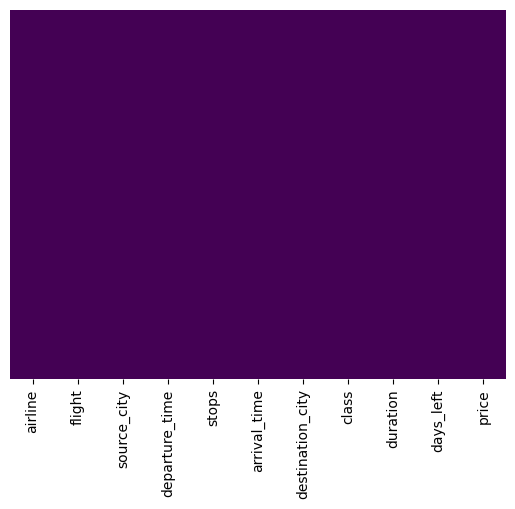

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

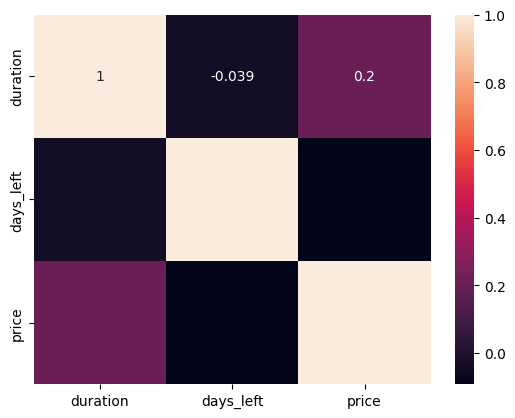

In [14]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

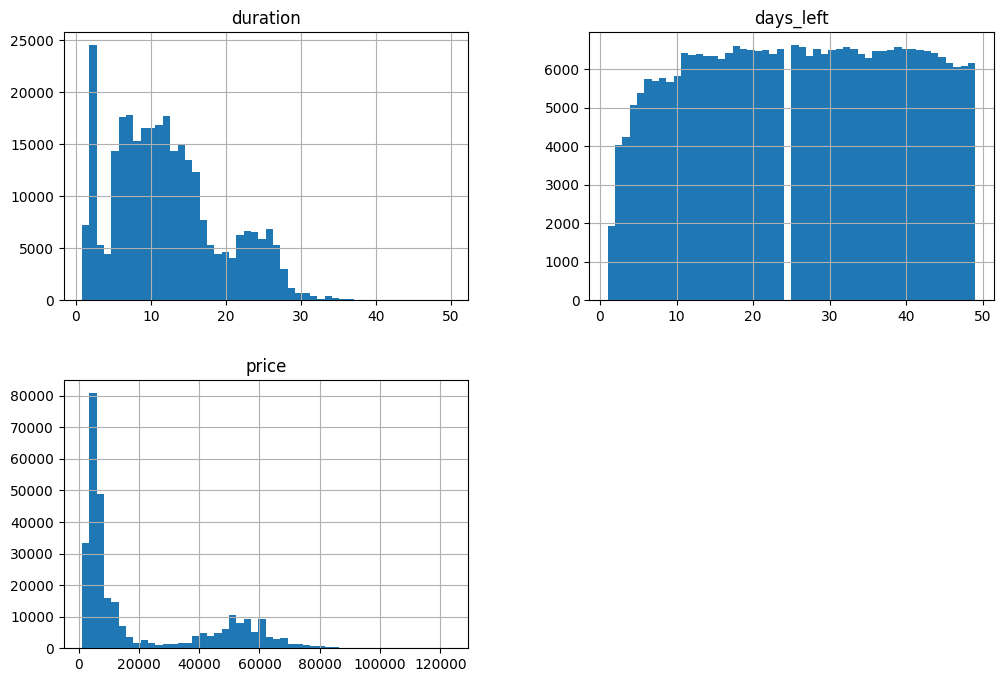

In [16]:
df.hist(bins=50, figsize=(12,8))
plt.show()

In [17]:
df.describe(include=['O'])

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,300153,300153,300153,300153,300153,300153,300153,300153
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,3235,61343,71146,250863,91538,59097,206666


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [19]:
cols = ['airline', 'source_city', 'departure_time',
        'stops', 'arrival_time', 'destination_city', 'class']

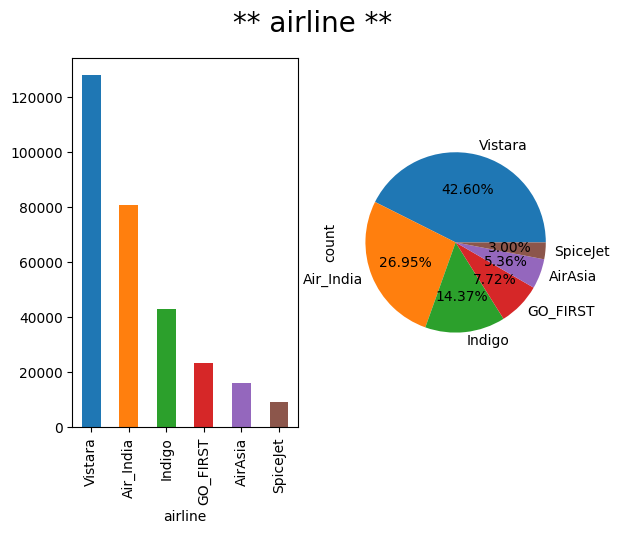

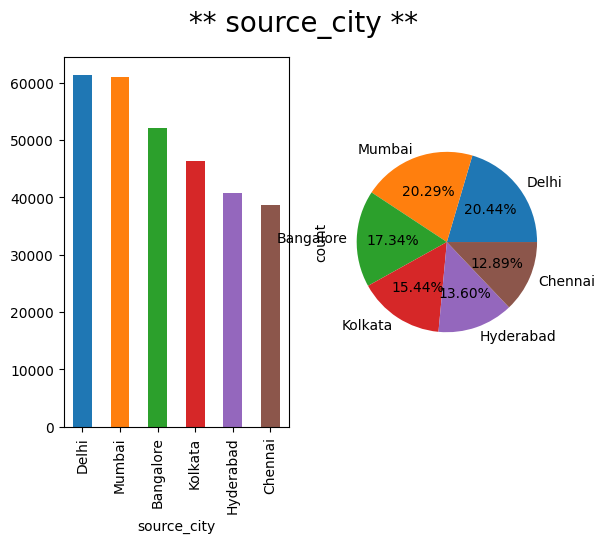

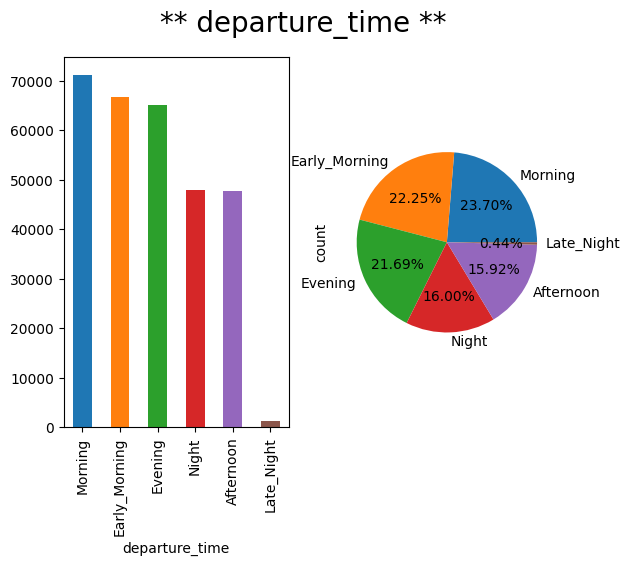

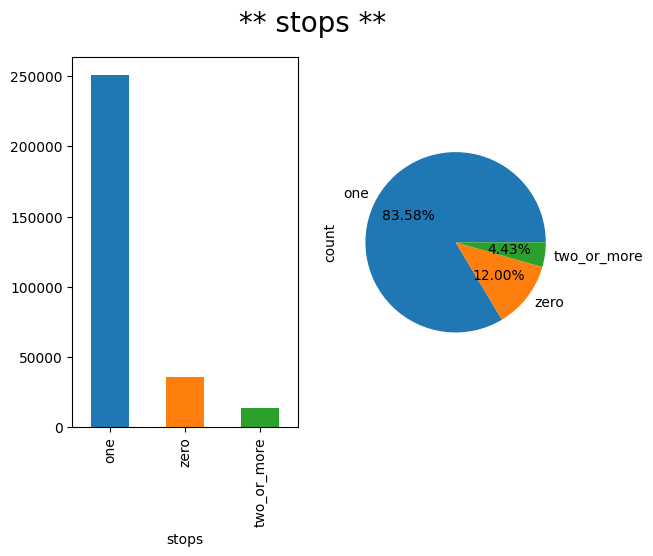

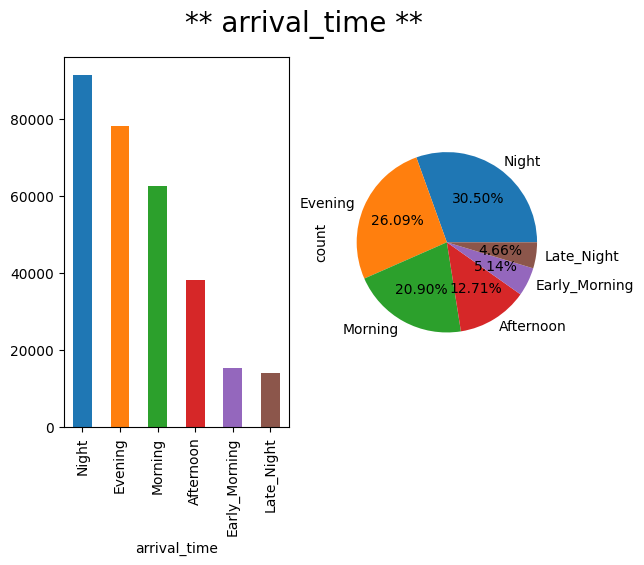

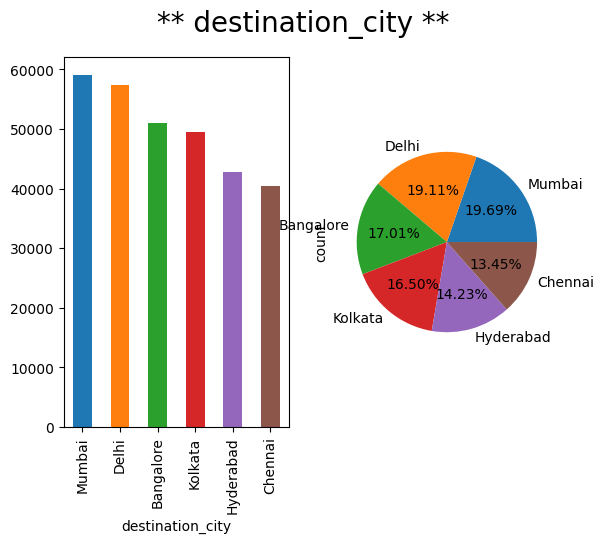

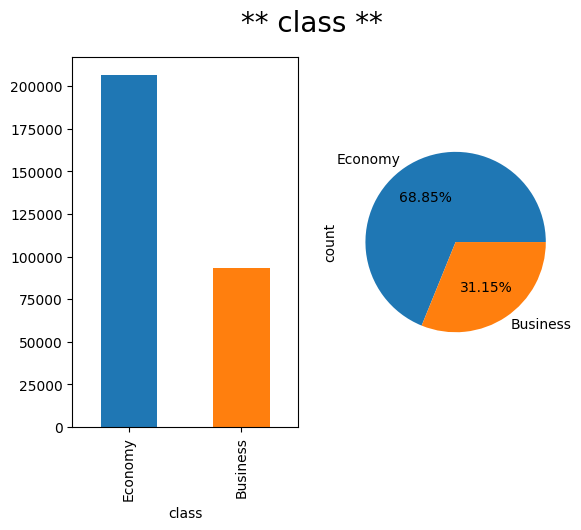

In [20]:
for i in cols:
        fig, ax = plt.subplots(1, 2)
        fig.suptitle('** ' + i + ' **', fontsize=20)
        #plt.style.use('seaborn')
        plt.subplot(1,2,1)
        df[i].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))
        plt.subplot(1,2,2)
        df[i].value_counts().plot(kind='pie',autopct="%.2f%%")
        plt.show()

In [21]:
print(df['class'].value_counts())

class
Economy     206666
Business     93487
Name: count, dtype: int64


In [22]:
num_columns = ['duration', 'days_left']

cat_columns = ['airline', 'source_city', 'departure_time', 'stops',
               'arrival_time', 'destination_city', 'class']

target = 'price'

/home/jotaalvim/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jotaalvim/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: >

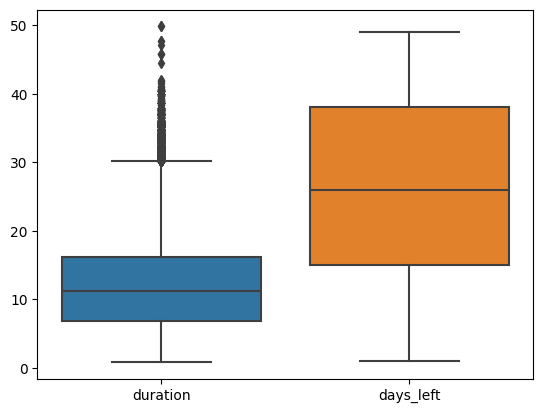

In [23]:
sns.boxplot(data=df[num_columns])

/home/jotaalvim/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jotaalvim/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jotaalvim/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jotaalvim/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

Text(0.5, 1.0, 'Airline prices based on the class and company')

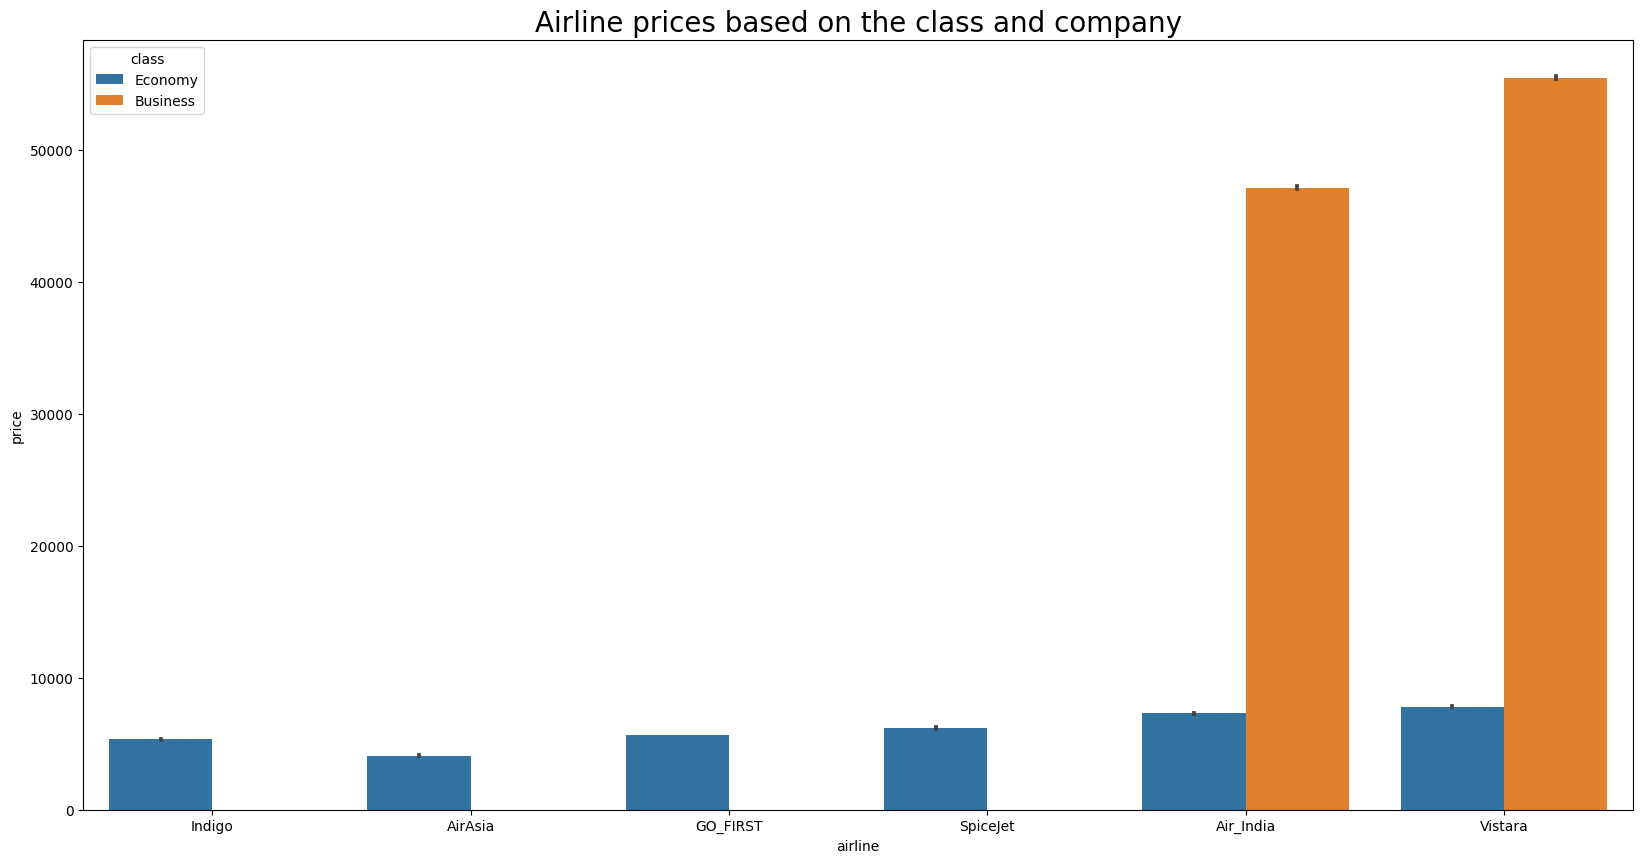

In [24]:
plt.figure(figsize=(20, 10))
sns.barplot(x='airline',y='price',hue="class",data=df.sort_values("price")).set_title('Airline prices based on the class and company',fontsize=20)

/home/jotaalvim/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jotaalvim/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


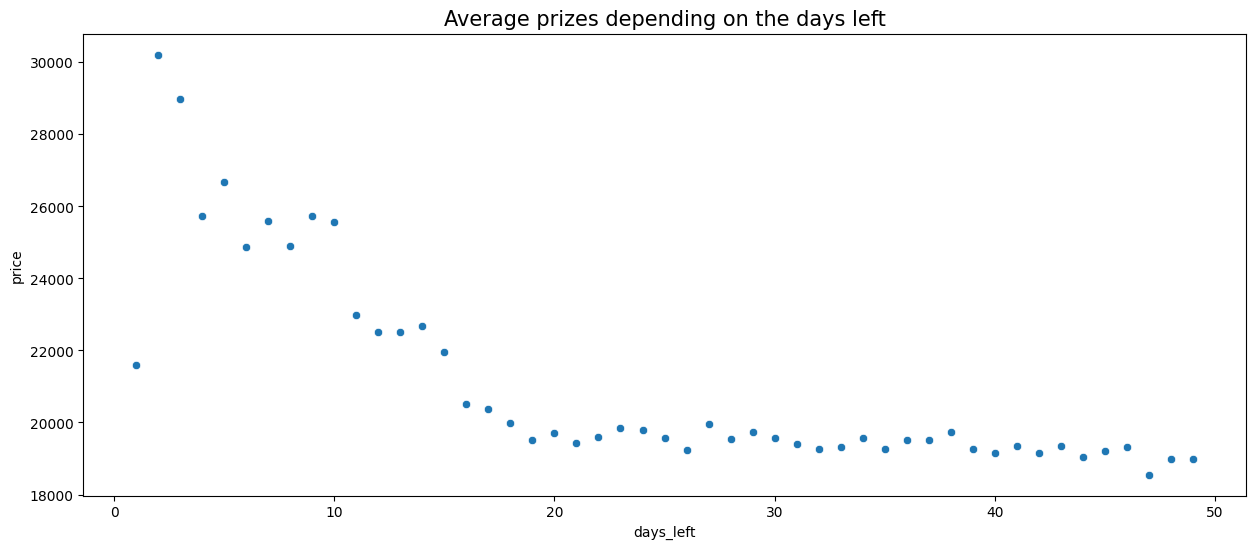

In [25]:
df_temp = df.groupby(['days_left'])['price'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="days_left", y="price", data=df_temp).set_title("Average prizes depending on the days left",fontsize=15)

/home/jotaalvim/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jotaalvim/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


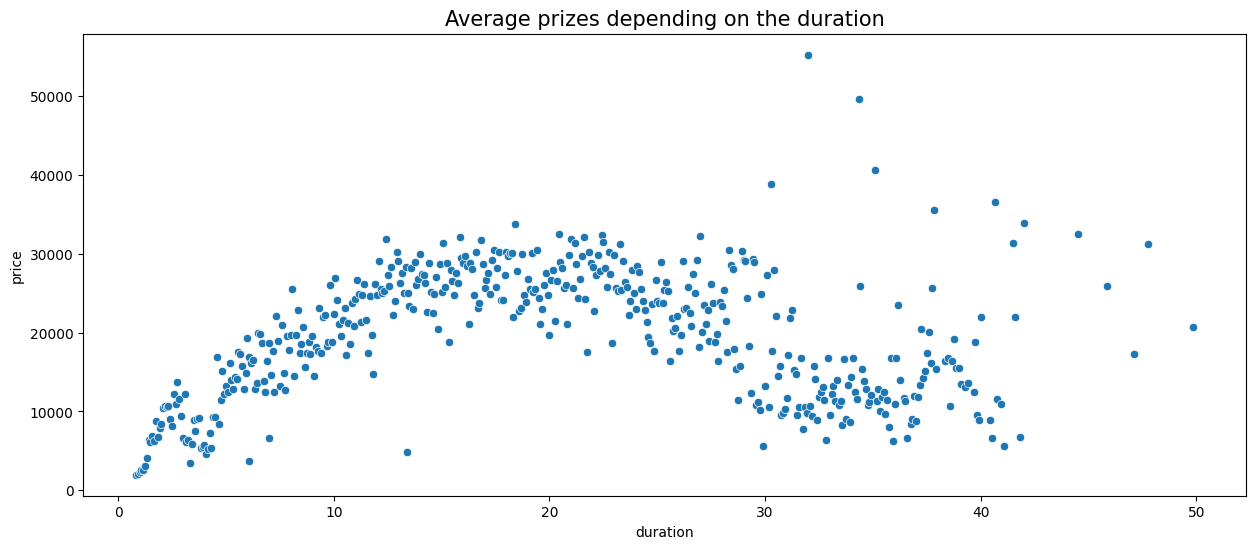

In [26]:
df_temp = df.groupby(['duration'])['price'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="duration", y="price", data=df_temp).set_title("Average prizes depending on the duration",fontsize=15)

/home/jotaalvim/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jotaalvim/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jotaalvim/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jotaalvim/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

Text(0.5, 1.0, 'Airline prices based on the number of stops  for business')

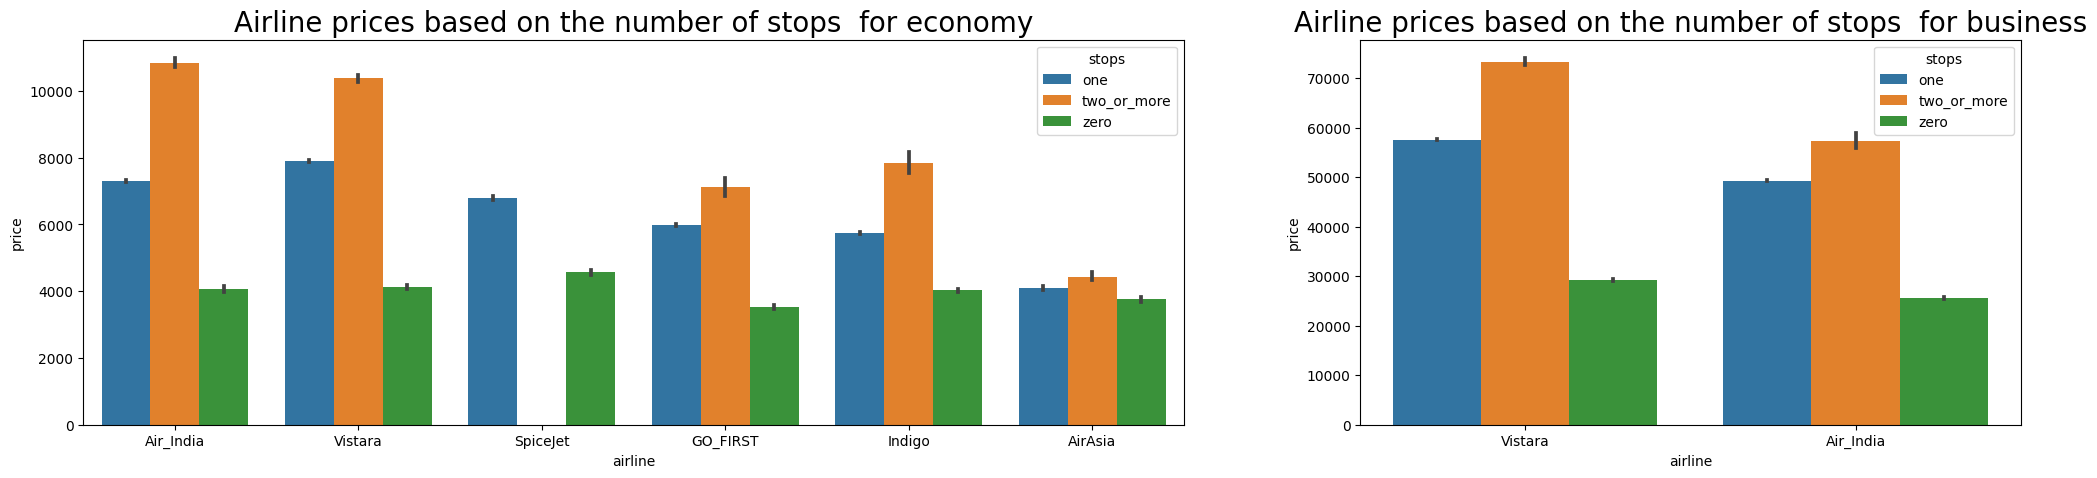

In [27]:
fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))
sns.barplot(y = "price", x = "airline",hue="stops",data = df.loc[df["class"]=='Economy'].sort_values("price", ascending = False), ax=axs[0])
axs[0].set_title("Airline prices based on the number of stops  for economy",fontsize=20)
sns.barplot(y = "price", x = "airline",hue="stops",data = df.loc[df["class"]=='Business'].sort_values("price", ascending = False), ax=axs[1])
axs[1].set_title("Airline prices based on the number of stops  for business",fontsize=20)

In [28]:
df_r1 = df.copy()

In [29]:
for col in cat_columns:
    df_r1[col] = pd.factorize(df_r1[col])[0]+1

df_r1.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,SG-8709,1,1,1,1,1,1,2.17,1,5953
1,1,SG-8157,1,2,1,2,1,1,2.33,1,5953
2,2,I5-764,1,2,1,3,1,1,2.17,1,5956
3,3,UK-995,1,3,1,4,1,1,2.25,1,5955
4,3,UK-963,1,3,1,2,1,1,2.33,1,5955


In [30]:
df_r1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int64  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int64  
 3   departure_time    300153 non-null  int64  
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  int64  
 6   destination_city  300153 non-null  int64  
 7   class             300153 non-null  int64  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 25.2+ MB


In [31]:
df_r1.nunique()

airline                 6
flight               1561
source_city             6
departure_time          6
stops                   3
arrival_time            6
destination_city        6
class                   2
duration              476
days_left              49
price               12157
dtype: int64

<Axes: >

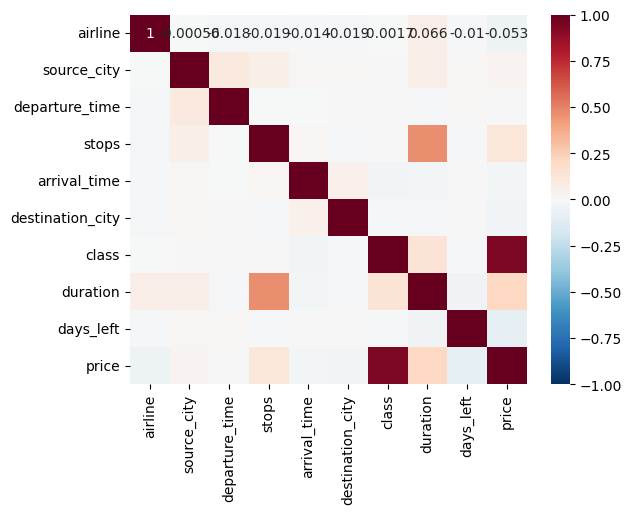

In [32]:

sns.heatmap(df_r1.corr(numeric_only=True), annot=True, vmin= -1.0, vmax= 1.0, center = 0,cmap = 'RdBu_r')

/home/jotaalvim/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jotaalvim/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jotaalvim/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jotaalvim/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

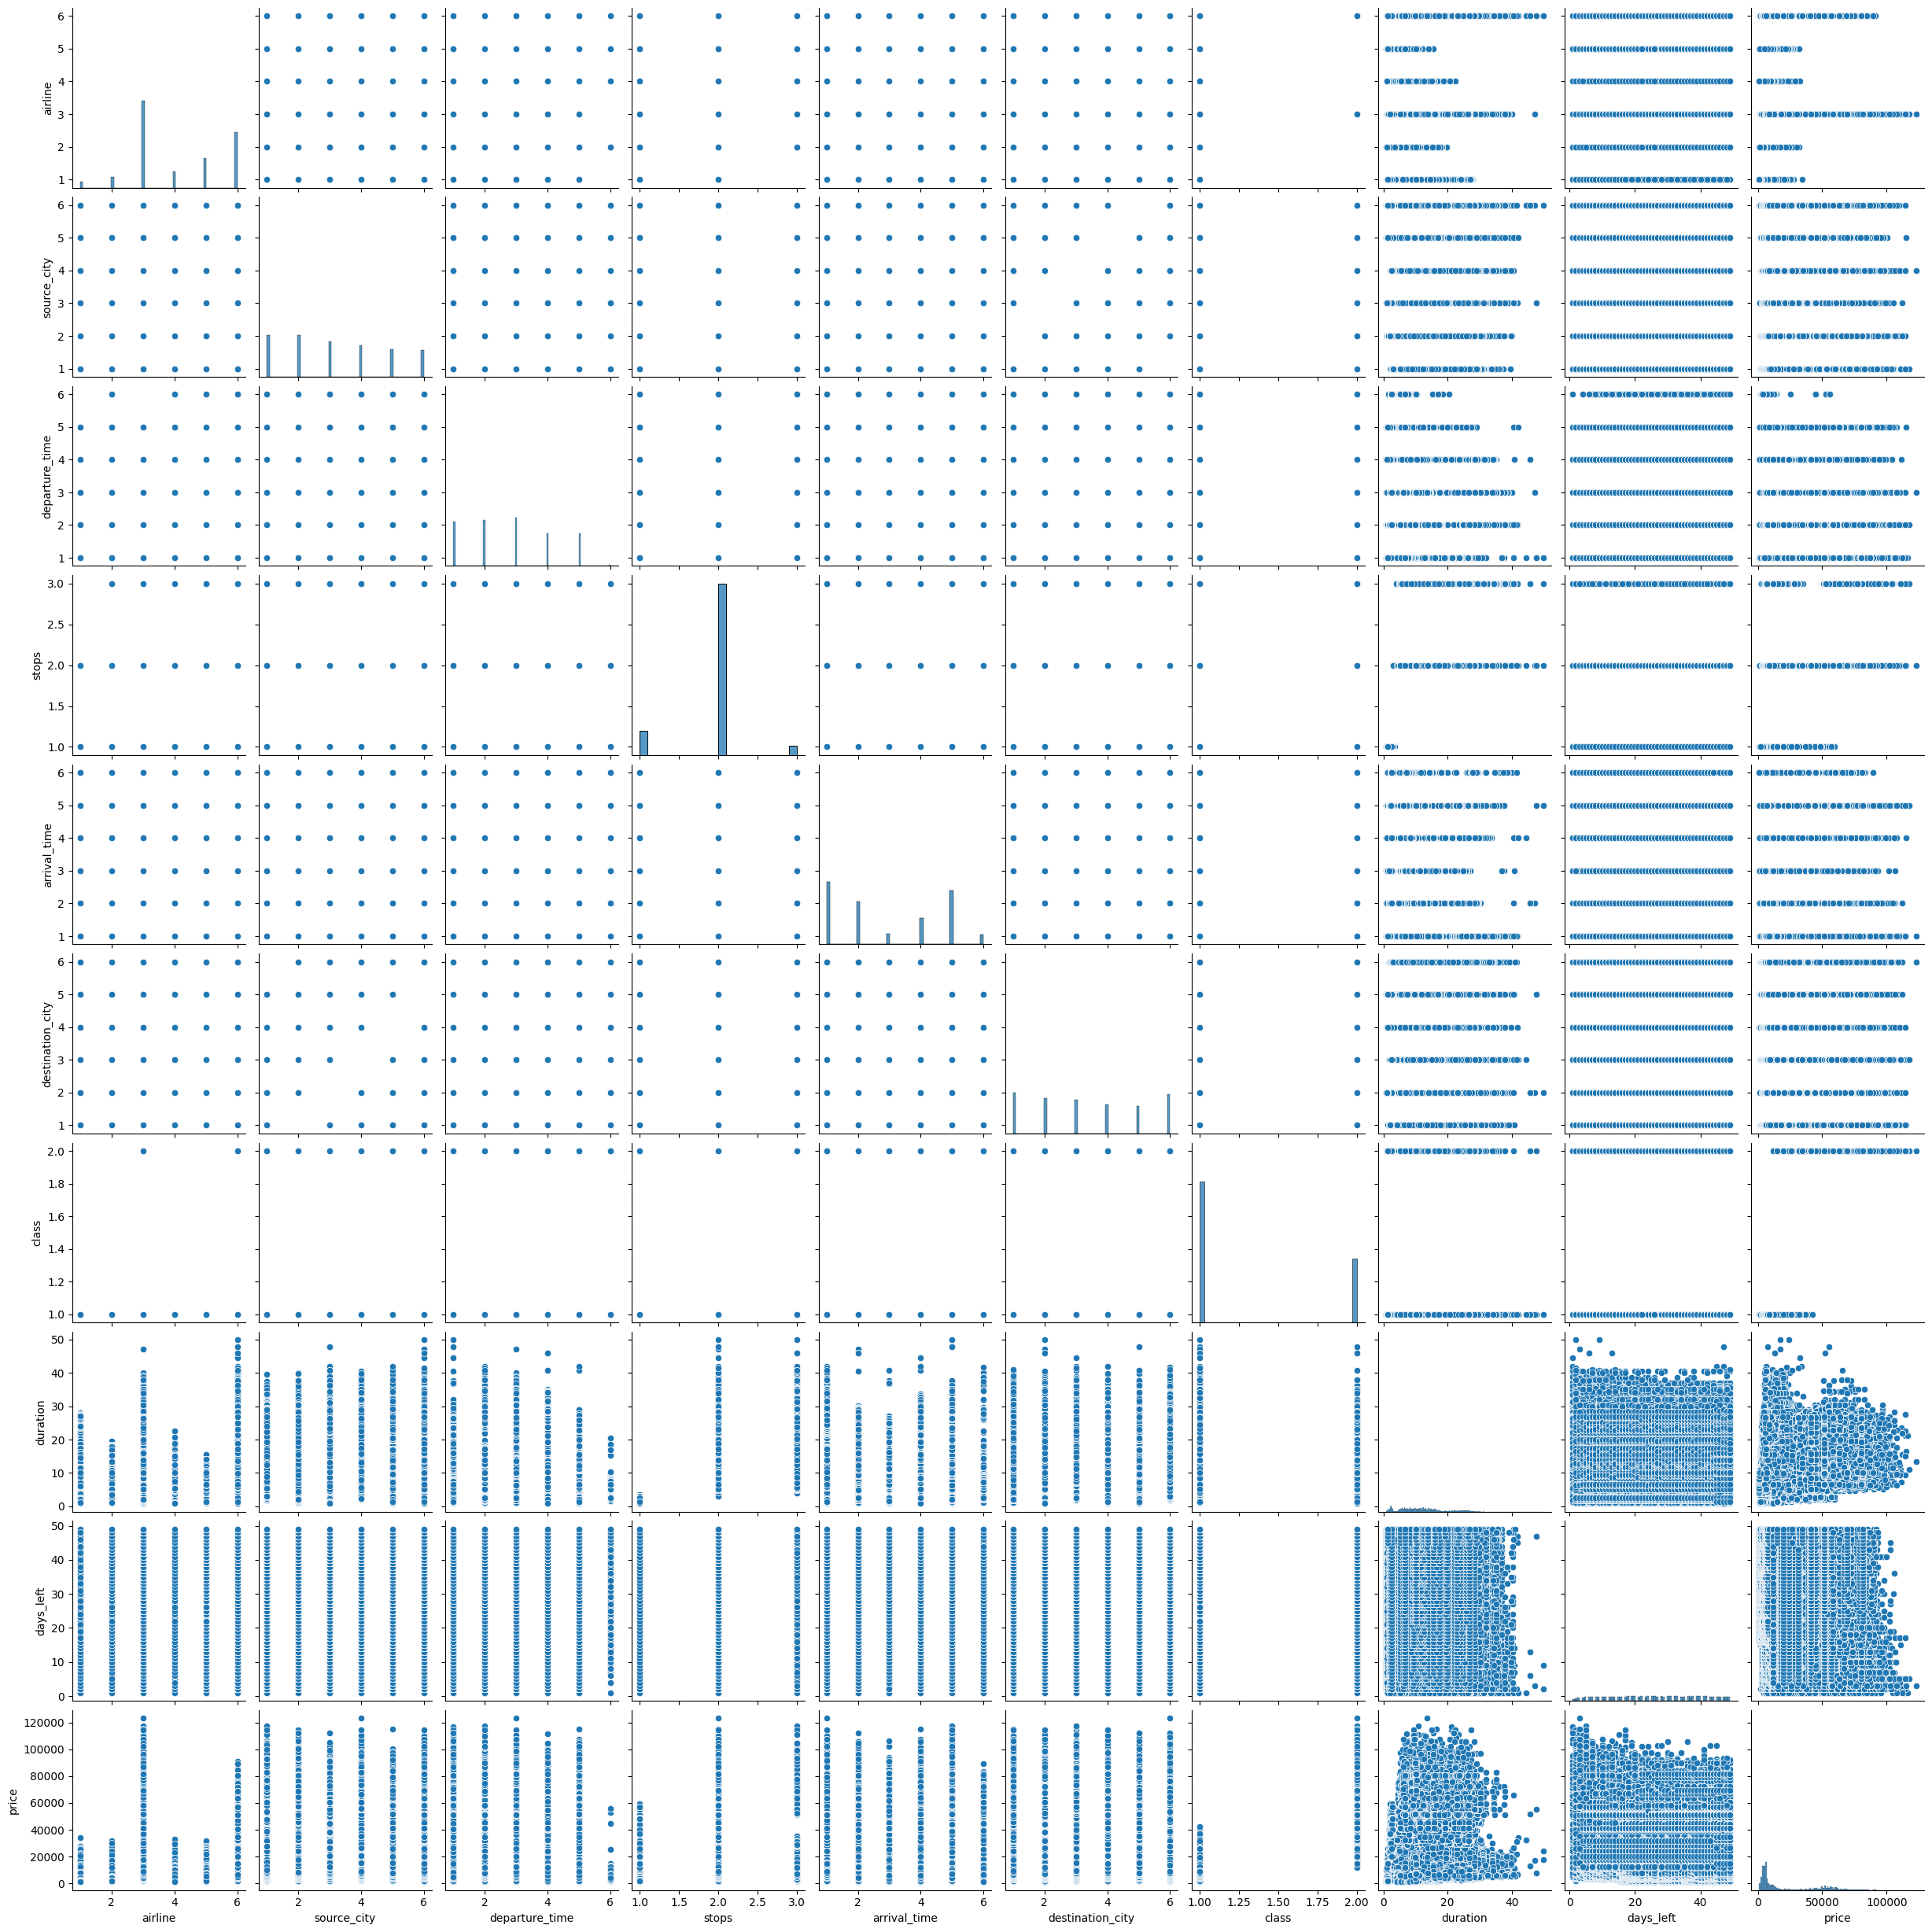

In [33]:
sns.pairplot(df_r1)

/home/jotaalvim/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jotaalvim/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jotaalvim/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jotaalvim/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

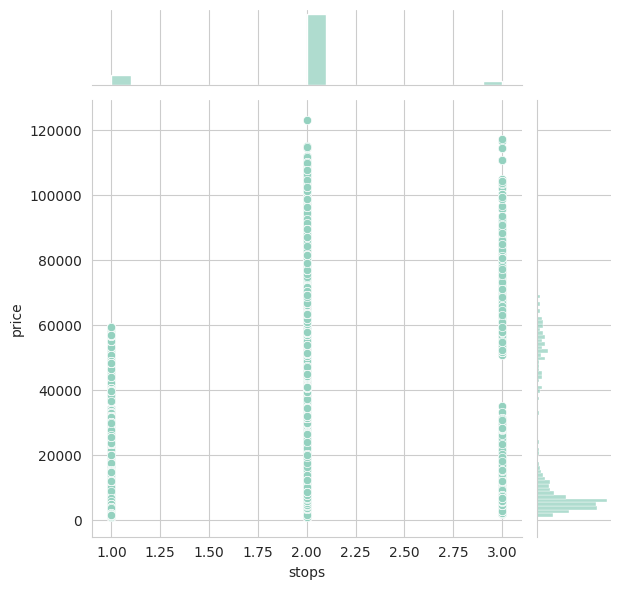

In [34]:
sns.set_palette('GnBu_d')
sns.set_style('whitegrid')

sns.jointplot(x='stops', y='price', data=df_r1)

/home/jotaalvim/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jotaalvim/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jotaalvim/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jotaalvim/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

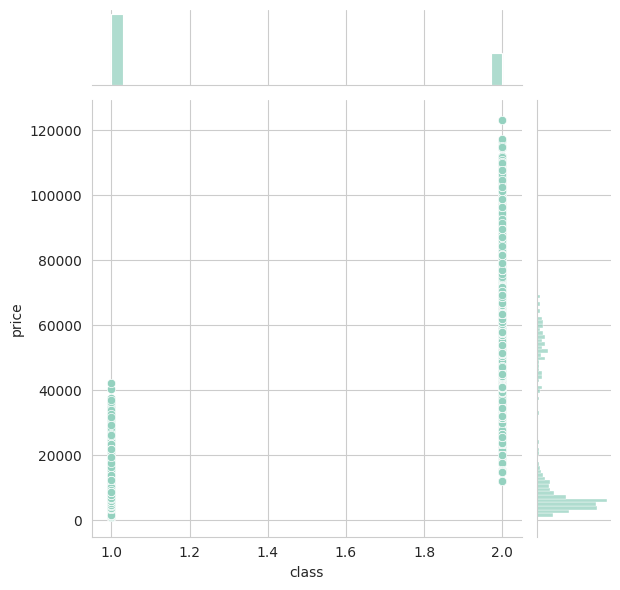

In [35]:
sns.jointplot(x='class', y='price', data=df_r1)

/home/jotaalvim/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jotaalvim/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jotaalvim/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jotaalvim/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

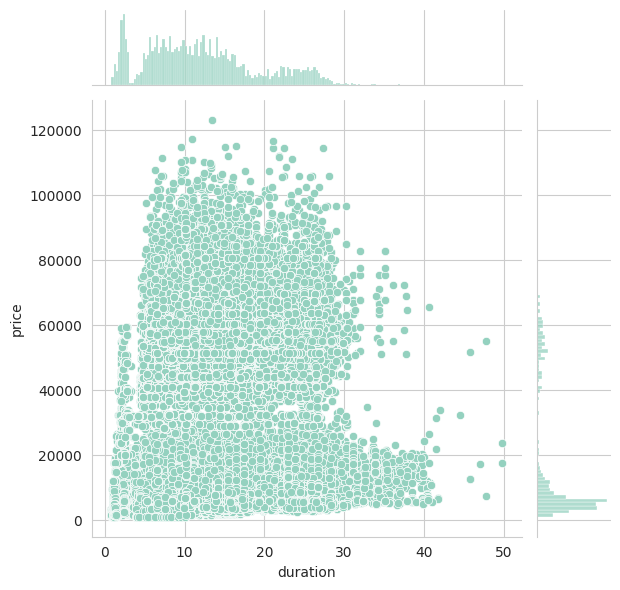

In [36]:
sns.jointplot(x='duration', y='price', data=df_r1)

/home/jotaalvim/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jotaalvim/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jotaalvim/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jotaalvim/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

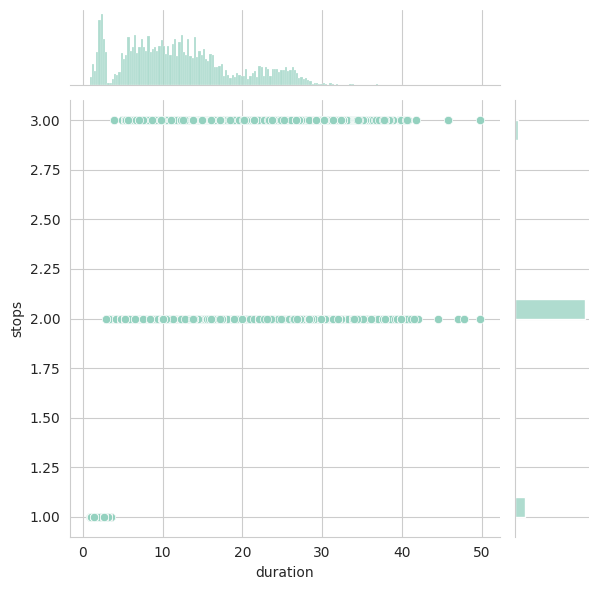

In [37]:
sns.jointplot(x='duration', y='stops', data=df_r1)

In [38]:
df_r2 = df_r1.copy()
df_r2 = df_r2.drop(["flight","airline","source_city","destination_city","departure_time","arrival_time"],axis=1)
#df_r2=df_r2.drop(columns=['flight'])

df_r2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   stops      300153 non-null  int64  
 1   class      300153 non-null  int64  
 2   duration   300153 non-null  float64
 3   days_left  300153 non-null  int64  
 4   price      300153 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 11.5 MB


In [39]:
X = df_r2.drop(['price'],axis=1)
y = df_r2['price']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2021)

In [41]:
clf = DecisionTreeRegressor(random_state=2021)

clf.fit(X_train, y_train)

DecisionTreeRegressor(random_state=2021)

In [42]:
predictions = clf.predict(X_test)
predictions

array([51385.5       ,  6058.71428571, 56169.        , ...,
       56590.        , 13116.78571429,  5779.28571429])

In [43]:
mean_absolute_error(y_test, predictions)

3767.033425003663

In [44]:
mean_squared_error(y_test, predictions, squared=True)

41616497.821758464

In [45]:
mean_squared_error(y_test, predictions, squared=False)

6451.08501120226

In [46]:
lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

In [47]:
print(lm.intercept_)

-48374.01350402825


In [48]:
X

,stops,class,duration,days_left
0,1,1,2.17,1
1,1,1,2.33,1
2,1,1,2.17,1
3,1,1,2.25,1
4,1,1,2.33,1
...,...,...,...,...
300148,2,2,10.08,49
300149,2,2,10.42,49
300150,2,2,13.83,49
300151,2,2,10.00,49


In [49]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
stops,6123.112808
class,45785.235224
duration,68.016394
days_left,-130.413305


In [50]:
predictions = lm.predict(X_test)

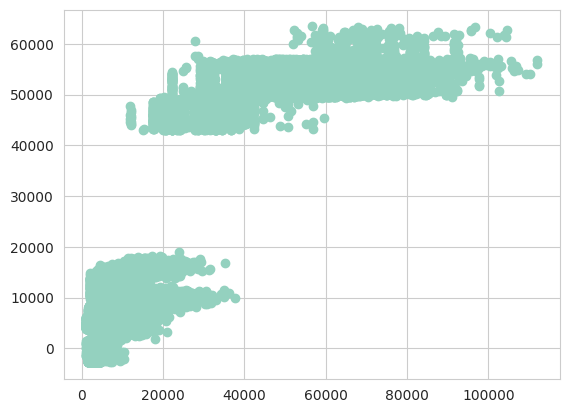

In [51]:
plt.scatter(y_test, predictions)

In [52]:
from sklearn.metrics import r2_score


r2 = r2_score(y_test, predictions)
print(f"Coeficiente de Determinação R²: {r2:.2f}")

Coeficiente de Determinação R²: 0.90


In [53]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4629.306664359113
MSE: 51573201.09384511
RMSE: 7181.448398049318


In [54]:
starttime = time.process_time()

logmodel1 = LogisticRegression(random_state=2022, solver='newton-cg')
print(logmodel1)
logmodel1.fit(X_train, y_train)

endtime= time.process_time()
print(f"Time spent: {endtime-starttime} seconds")

LogisticRegression(random_state=2022, solver='newton-cg')


MemoryError: Unable to allocate 18.9 GiB for an array with shape (225114, 11269) and data type float64

In [ ]:
predictions1 = logmodel1.predict(X_test)

In [ ]:
starttime = time.process_time()

logmodel2 = LogisticRegression(random_state=2022, solver='lbfgs')
print(logmodel2)
logmodel2.fit(X_train, y_train)

endtime= time.process_time()
print(f"Time spent: {endtime-starttime} seconds")

In [ ]:
predictions2 = logmodel2.predict(X_test)

In [ ]:
starttime = time.process_time()

logmodel3 = LogisticRegression(random_state=2022, solver='liblinear')
print(logmodel3)
logmodel3.fit(X_train, y_train)

endtime= time.process_time()
print(f"Time spent: {endtime-starttime} seconds")

In [ ]:
predictions3 = logmodel3.predict(X_test)

In [ ]:
#print("With 'newton-cd': \n", classification_report(y_test, predictions1))
#print("With 'lbfgs': \n", classification_report(y_test, predictions2))
#print("With 'liblinear': \n", classification_report(y_test, predictions3))

In [ ]:
#ConfusionMatrixDisplay.from_predictions(y_test, predictions1)
#ConfusionMatrixDisplay.from_predictions(y_test, predictions2)
#ConfusionMatrixDisplay.from_predictions(y_test, predictions3)
#plt.show()